In [357]:
from functions.functions_turbulence import *

In [358]:
lmbda = 633e-9
L_prop = 150  # ! точно
width0 = 15e-3 / 10  # !? может точно
xy_lim_2D = (-200.0e-3, 200.0e-3)
res_xy_2D = 801
l = 0
p = 0
extend = [*xy_lim_2D, *xy_lim_2D]

In [359]:
beam_par = (l, p, width0, lmbda)
k0 = 2 * np.pi / lmbda

xy_2D = np.linspace(*xy_lim_2D, res_xy_2D)
mesh_2D = np.meshgrid(xy_2D, xy_2D, indexing='ij')
pxl_scale = (xy_lim_2D[1] - xy_lim_2D[0]) / (res_xy_2D - 1)
D_window = (xy_lim_2D[1] - xy_lim_2D[0])
perfect_scale = lmbda * np.sqrt(L_prop ** 2 + (D_window / 2) ** 2) / D_window
print(f'dx={pxl_scale * 1e6: .2f}um, perfect={perfect_scale * 1e6: .2f}um,'
      f' resolution required={math.ceil(D_window / perfect_scale + 1)}')

dx= 500.00um, perfect= 237.38um, resolution required=1687


In [360]:
Cn2 = 1.35e-13
Cn2 = 3.21e-14
r0 = r0_from_Cn2(Cn2=Cn2, k0=k0, dz=L_prop)
print(f'r0 parameter: {r0}')
L0 = 9
l0 = 2e-3  # !!!!!!
psh_par = (r0, res_xy_2D, pxl_scale, L0, l0)

r0 parameter: 0.04154383786882477


In [361]:
screens_num = screens_number(Cn2, k0, dz=L_prop)
print(f'Number of screen required: {screens_num}')

ryt = rytov(Cn2, k0, L_prop)
print(f'SR={np.exp(-ryt)} (Rytov)')

Number of screen required: 0.7294419082738279
SR=0.9454624826329648 (Rytov)


In [362]:
# Denis
C00 = 1.51
C01 = -5.06
C02 = 7.23
C03 = -2.04
C30 = -3.97
C_31 = 0
field = (
		C00 * LG_simple(*mesh_2D, z0=0, l=0, p=0, width=width0, k0=k0) +
		C01 * LG_simple(*mesh_2D, z0=0, l=0, p=1, width=width0, k0=k0) +
		C02 * LG_simple(*mesh_2D, z0=0, l=0, p=2, width=width0, k0=k0) +
		C03 * LG_simple(*mesh_2D, z0=0, l=0, p=3, width=width0, k0=k0) +
		C30 * LG_simple(*mesh_2D, z0=0, l=3, p=0, width=width0, k0=k0) +
		C_31 * LG_simple(*mesh_2D, z0=0, l=-3, p=1, width=width0, k0=k0)
)

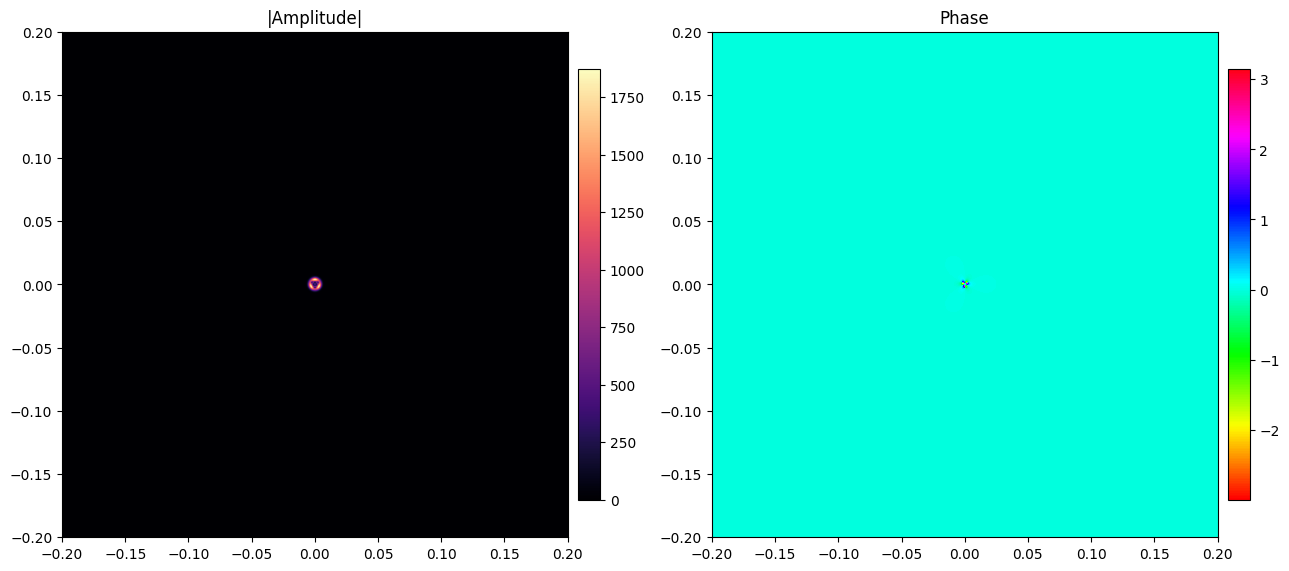

In [363]:
plot_field_both(field, extend=extend)

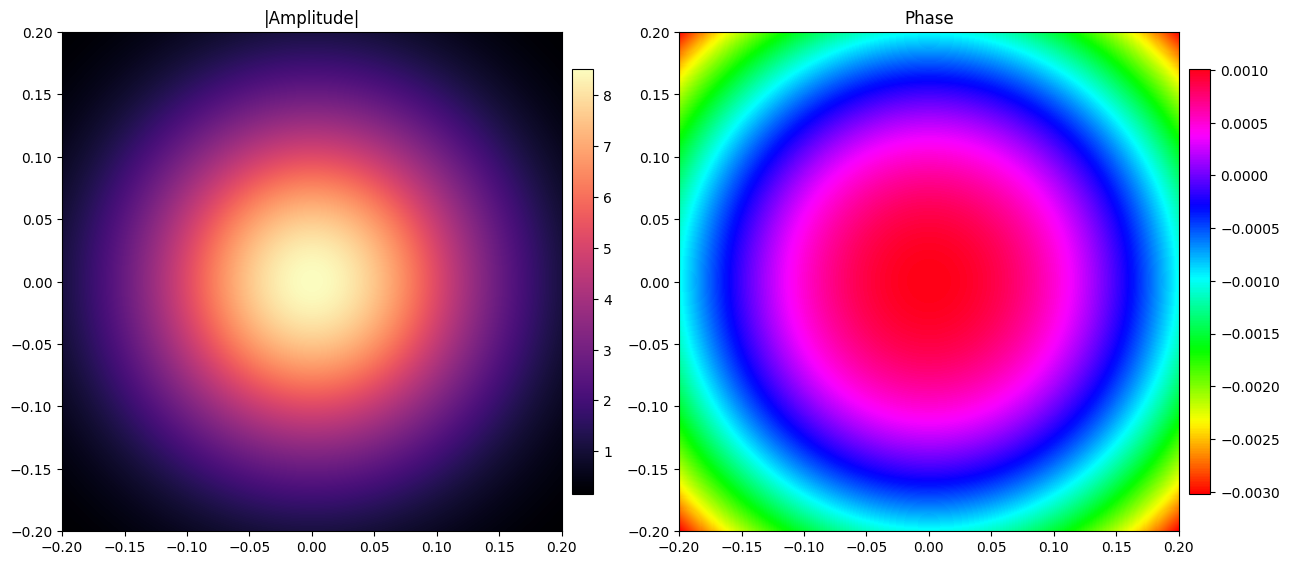

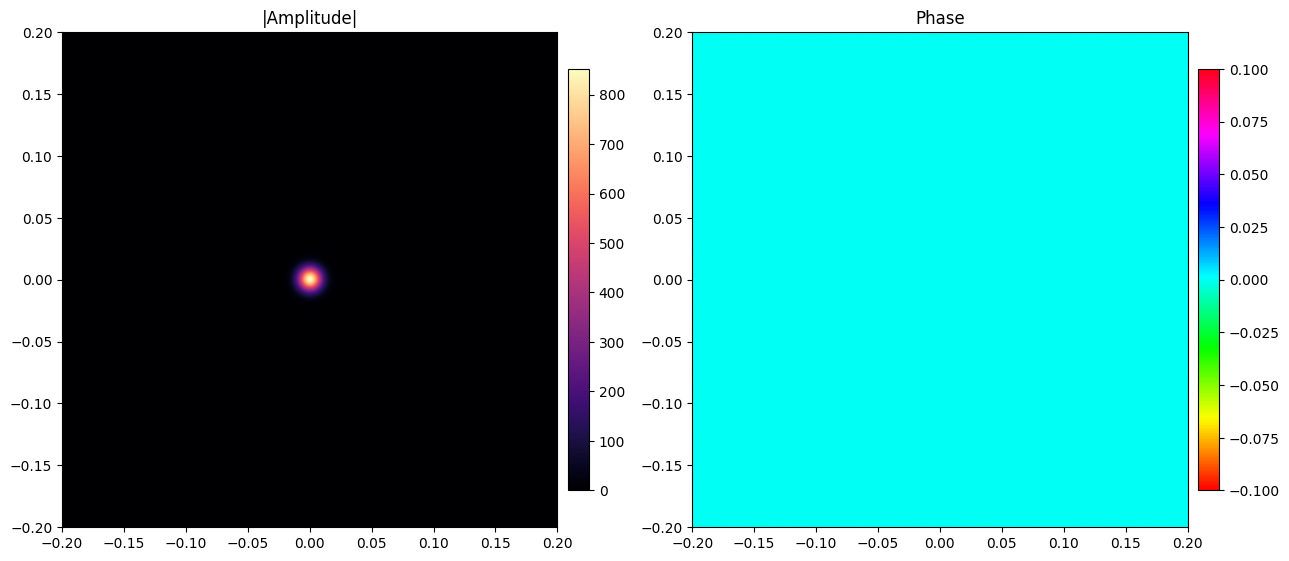

In [451]:
xy_lim_2D = (-3e-1, 3e-1)
xy_2D = np.linspace(*xy_lim_2D, res_xy_2D)
mesh_2D = np.meshgrid(xy_2D, xy_2D, indexing='ij')
pxl_scale = (xy_lim_2D[1] - xy_lim_2D[0]) / (res_xy_2D - 1)
D_window = (xy_lim_2D[1] - xy_lim_2D[0])
# Denis
C00 = 1.51
C01 = -5.06 * 0
C02 = 7.23 * 0
C03 = -2.04 * 0
C30 = -3.97 * 0
C_31 = 0
z0 = 0
width0 = 1e-3
mesh_temp = (np.array(mesh_2D) /10)
field_z0 = (
		C00 * LG_simple(*mesh_temp, z0=z0, l=0, p=0, width=width0, k0=k0) +
		C01 * LG_simple(*mesh_temp, z0=z0, l=0, p=1, width=width0, k0=k0) +
		C02 * LG_simple(*mesh_temp, z0=z0, l=0, p=2, width=width0, k0=k0) +
		C03 * LG_simple(*mesh_temp, z0=z0, l=0, p=3, width=width0, k0=k0) +
		C30 * LG_simple(*mesh_temp, z0=z0, l=3, p=0, width=width0, k0=k0) +
		C_31 * LG_simple(*mesh_temp, z0=z0, l=-3, p=1, width=width0, k0=k0)
)
plot_field_both(field_z0, extend=extend)

In [365]:
# width0 = 1e-1
# print(f"Raleigh range: {(k0 * (width0) ** 2)}")
# width0 = 1e-2
# print(f"Raleigh range: {(k0 * (width0) ** 2)}")
# width0 = 1e-3
# print(f"Raleigh range: {(k0 * (width0) ** 2)}")
# width0 = 1e-4
# print(f"Raleigh range: {(k0 * (width0) ** 2)}")
# width0 = 1e-5
# print(f"Raleigh range: {(k0 * (width0) ** 2)}")
# width0 = 1e-6
# print(f"Raleigh range: {(k0 * (width0) ** 2)}")


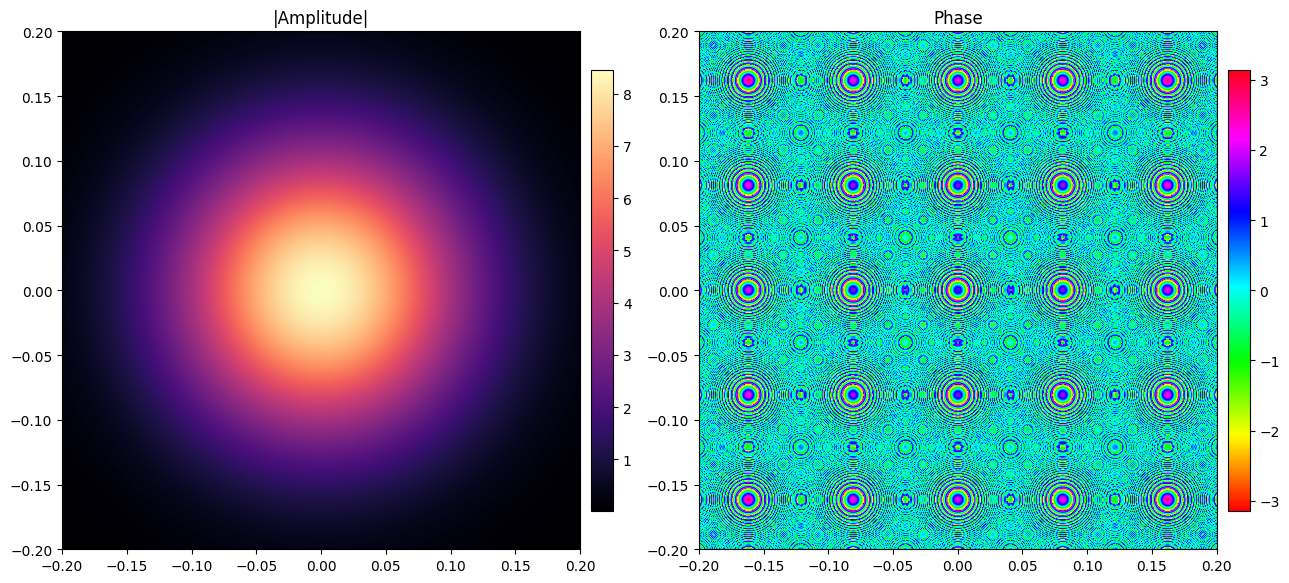

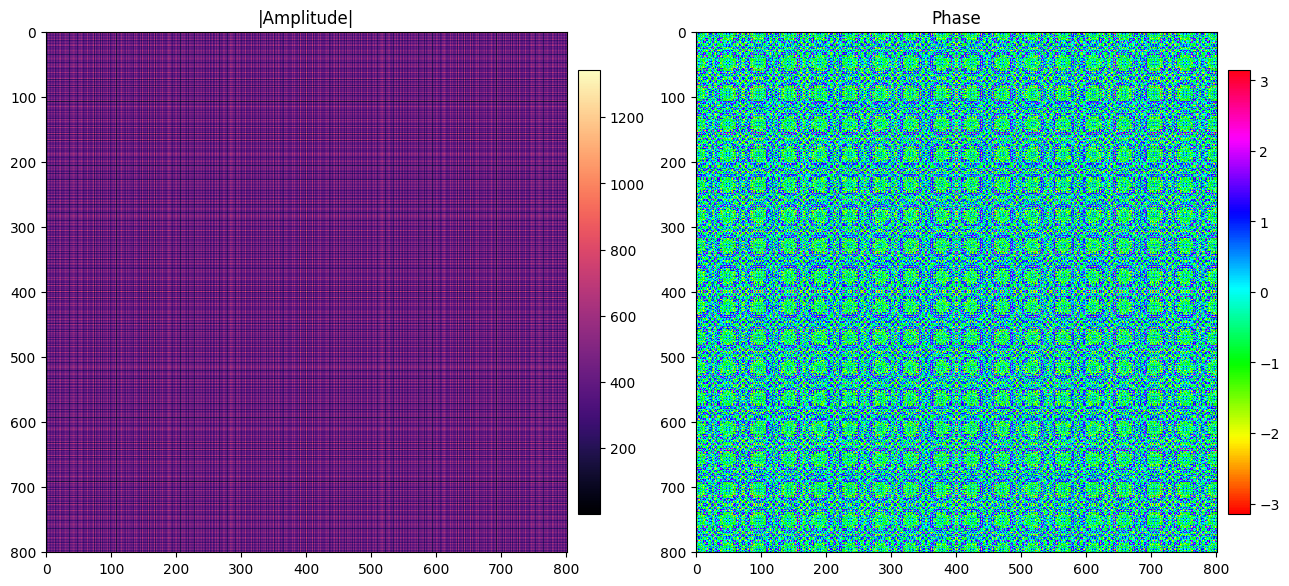

In [391]:

def propagation_ps(beam_2D, beam_par, psh_par, L_prop, screens_num=1, multiplier=1, seed=None):
	_, _, _, lmbda = beam_par
	r0, res_xy_2D, pxl_scale, L0, l0 = psh_par
	k0 = 2 * np.pi / lmbda
	Cn2 = Cn2_from_r0(r0, k0, L_prop)
	dL = L_prop / screens_num
	if type(multiplier) is not list:
		dMult = [multiplier ** (1 / screens_num)] * screens_num
	else:
		dMult = multiplier
	r0 = r0_from_Cn2(Cn2=Cn2, k0=k0, dz=dL)


	E = beam_2D
	current_scale = 1
	for i in range(screens_num):
		psh_par_dL = r0 * 1e100, res_xy_2D, pxl_scale / current_scale, L0, l0
		phase_screen_i = psh_wrap(psh_par_dL, seed=seed)
		E = opticalpropagation.angularSpectrum(
			E * np.exp(1j * phase_screen_i), lmbda,
			pxl_scale / current_scale, pxl_scale / (current_scale * dMult[i]), dL
		)
		plot_field_both(E, extend=None)
		current_scale *= dMult[i]
	return E

beam_par = (l, p, width0, lmbda)
# psh_par = (r0, res_xy_2D, pxl_scale, L0, l0)
field_z = propagation_ps(field_z0, beam_par, psh_par, 100, multiplier=[150, 2, 1, 3], screens_num=1, seed=1)
# plot_field_both(field_z, extend=None)

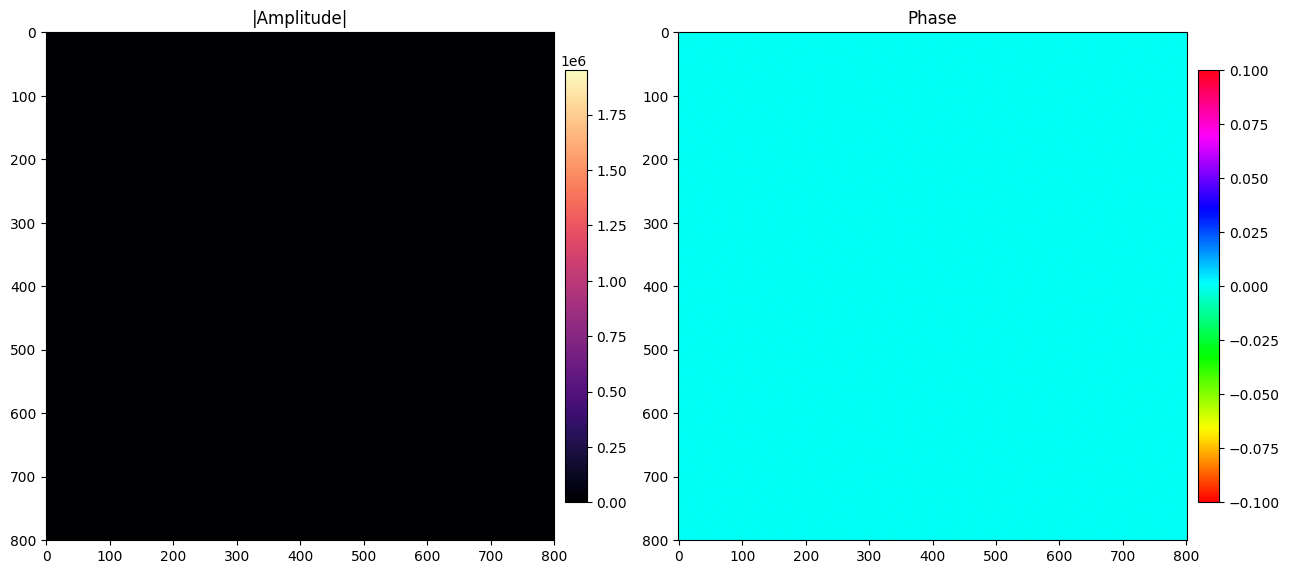

In [367]:
E = field_z0
current_scale = 1
multiplier = 6
dL = 1

# E = opticalpropagation.angularSpectrum(
# 	E * np.exp(1j), lmbda,
# 	pxl_scale / 1, pxl_scale / 1, dL
# )

# plot_field_both(E, extend=None)
plot_field_both(np.abs(np.fft.fft2(E)), extend=None)

9926043.139304243 0.0005


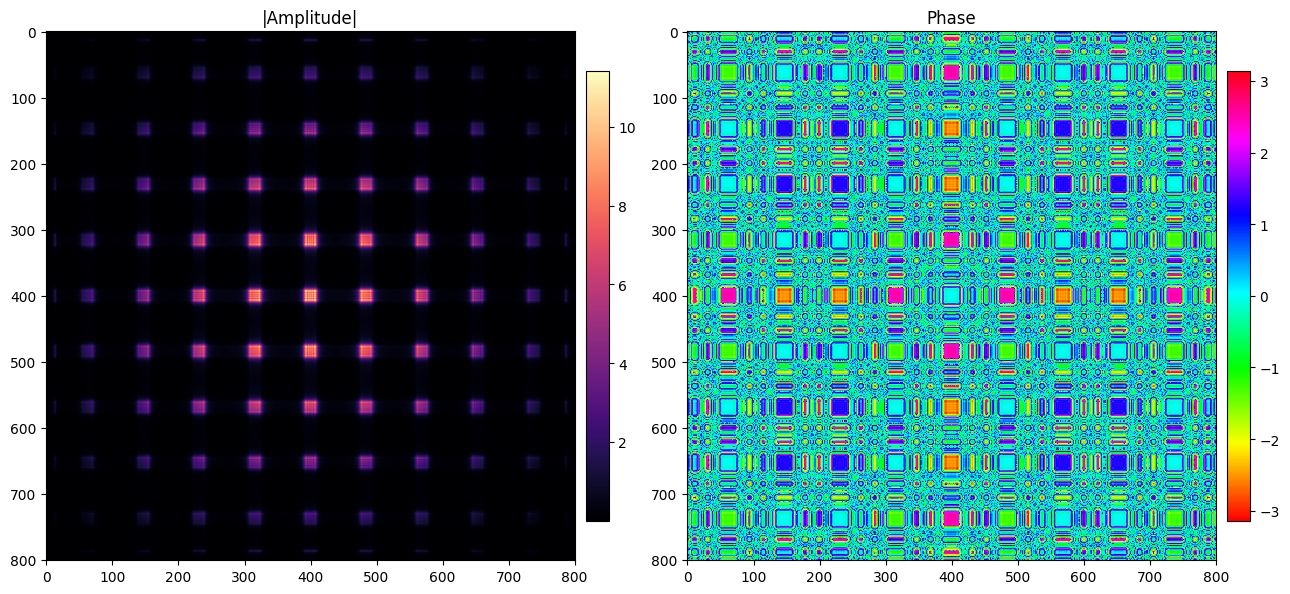

In [368]:
print(k0, pxl_scale)
E = field_z0
current_scale = 1
multiplier = 1
dL = 100

E = opticalpropagation.angularSpectrum(
	E * np.exp(0j), lmbda,
	pxl_scale, pxl_scale * 4, dL
)

plot_field_both(E, extend=None)

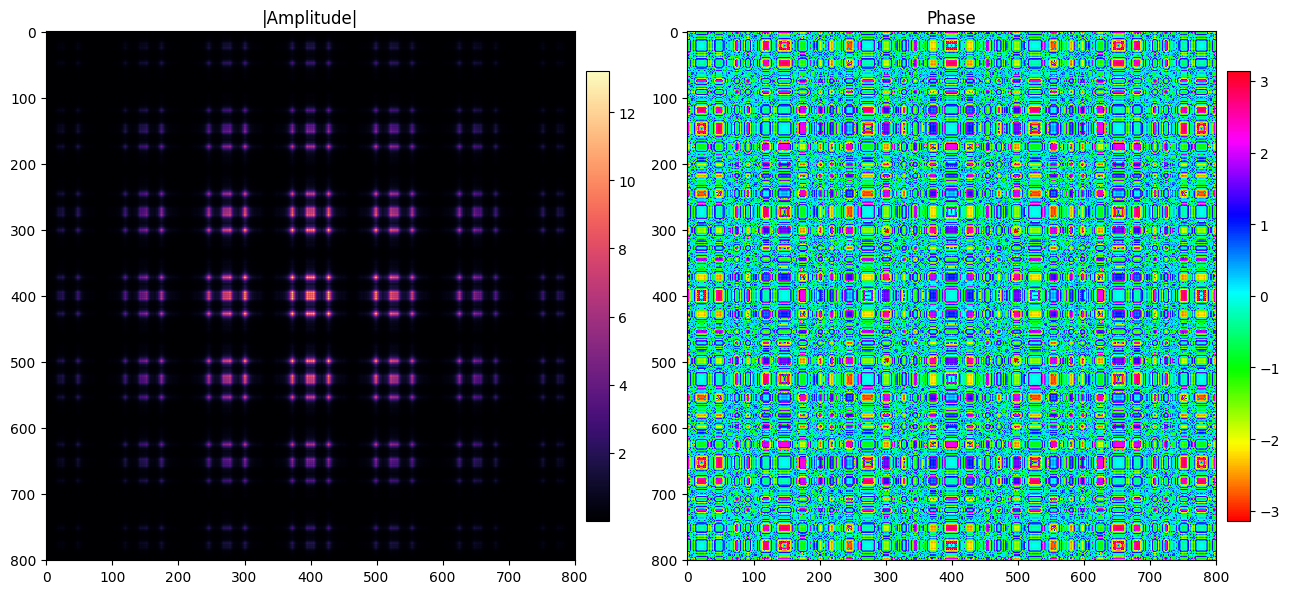

In [369]:

E = field_z0
dL = 50

E = opticalpropagation.angularSpectrum(
	E * np.exp(0j), lmbda,
	pxl_scale, pxl_scale * 2, dL
)
E = opticalpropagation.angularSpectrum(
	E * np.exp(0j), lmbda,
	pxl_scale * 2, pxl_scale * 4, dL
)

plot_field_both(E, extend=None)

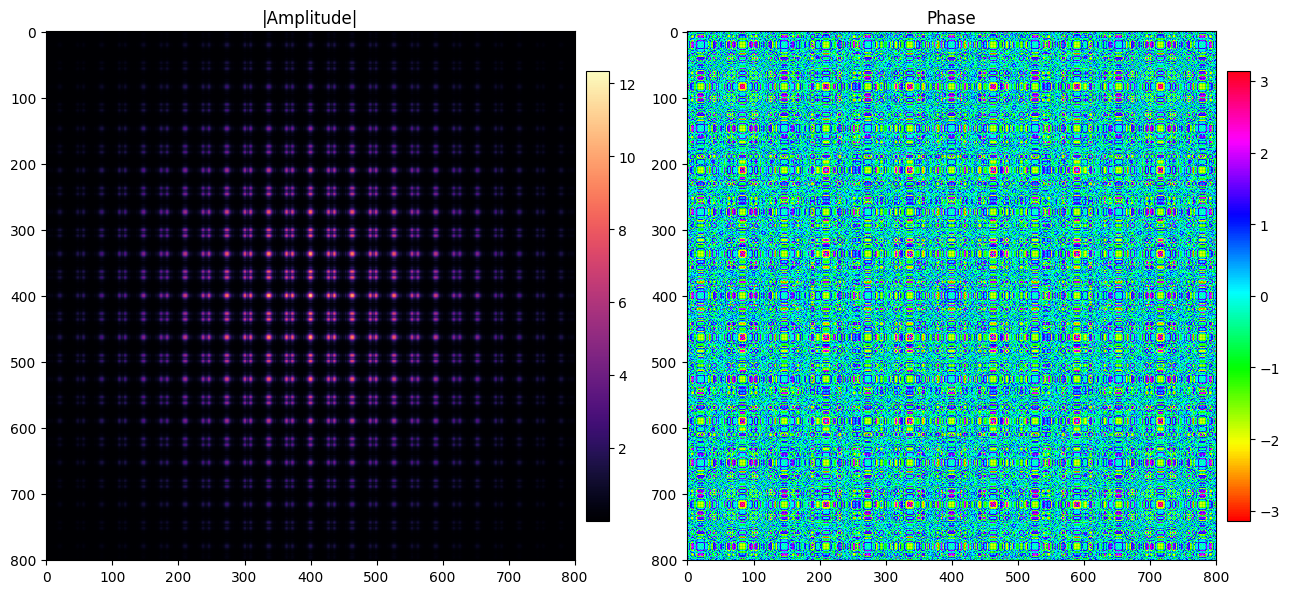

In [370]:
E = field_z0
dL = 25

E = opticalpropagation.angularSpectrum(
	E * np.exp(0j), lmbda,
	pxl_scale, pxl_scale, dL
)
E = opticalpropagation.angularSpectrum(
	E * np.exp(0j), lmbda,
	pxl_scale * 1, pxl_scale * 3, dL
)
E = opticalpropagation.angularSpectrum(
	E * np.exp(0j), lmbda,
	pxl_scale * 3, pxl_scale * 3, dL
)
E = opticalpropagation.angularSpectrum(
	E * np.exp(0j), lmbda,
	pxl_scale * 3, pxl_scale * 4, dL
)

plot_field_both(E, extend=None)